## Lendo planilhas complicadas

<br>

Estamos acostumados a ler arquivos de dados com o `pd.read_csv()`, mas para ler arquivos xls do Excel é preciso usar `pd.read_excel()`. A estrutura é muito semelhante. 

Planilhas do Excel podem apresentar alguns obstáculos:
- linhas com explicações sobre os dados antes e depois dos dados propriamente ditos.
- células mescladas.
- mais de uma planilha (aba) em um mesmo arquivo
- colunas vazias.

Aqui vamos aprender a lidar com esses problemas, trabalhando com as [séries estatísticas conjunturais da Carta de Conjuntura do Ipea](http://www.ipea.gov.br/cartadeconjuntura/index.php/series-estatisticas-conjunturais-2/).  

<br>
<br>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

Para nos certificarmos de que estamos lendo os dados corretamente, vamos lê-los sem criar um objeto e pedindo para ver apenas as primeiras observações.

In [2]:
pd.read_excel('dados/carta_conjuntura_series_historicas.xls').head()

,Unnamed: 0,VIII. SÉRIES HISTÓRICAS Carta de Conjuntura | Outubro 2017
0,NaN,1. Brasil: Indicadores Macroeconômicos
1,NaN,2. Indicadores de Preços
2,NaN,"3A. Indicadores de Preços, Juros e Câmbio após..."
3,NaN,3B. Inflação: Taxas Anuais
4,NaN,3C. Taxas de Variação em 12 Meses no Regime de...


Um primeiro problema. A planilha lida contém apenas o índice das planilhas que há no arquivo.   
Para ler a planilha que realmente nos interessa, é preciso indicar a aba correta usando o argumento `sheetname`.

In [3]:
pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1).head()

,VIII. SÉRIES HISTÓRICAS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Carta de Conjuntura | Outubro 2017
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,TABELA VIII.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,BRASIL: INDICADORES MACROECONÔMICOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Ano,Crescimento do PIB,Variação do deflator implícito do PIB,PIB,IGP,População,Taxa de câmbio,PIB (US$) c,Carga tributária d,Crescimento do PIB mundial e,Crescimento do PIB na América Latina


O resultado acima mostra que os dados não começam nas primeiras linhas, por isso, é preciso pedir para o pandas pular as primeiras cinco linhas usando o argumento `skiprows`.

In [6]:
pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=5).head()

,Unnamed: 0,Ano,Crescimento do PIB,Variação do deflator implícito do PIB,PIB,IGP,População,Taxa de câmbio,PIB (US$) c,Carga tributária d,Crescimento do PIB mundial e,Crescimento do PIB na América Latina
0,NaN,NaN,(%),(%),nominal a,[dez./dez. (%)],(mil habitantes),média (US$) b,NaN,(% do PIB),(%),(%)
1,NaN,1948,9.7,5.80623,207.3,7.96461,49223.1,18.72,11073.717949,14,NaN,4.7
2,NaN,1949,7.7,8.3032,241.8,12.2951,50542.1,18.72,12916.666667,14.4,NaN,2.7
3,NaN,1950,6.8,9.04484,281.6,12.4088,51944.4,18.72,15042.735043,14.4,NaN,4.9
4,NaN,1951,4.9,18.1117,348.9,12.3377,53432.2,18.72,18637.820513,15.7,NaN,5.9


Um próximo problema é o fato de que a primeira coluna está em branco.  
Para resolver isso é preciso usar o argumento `parse_cols`. Ele recebe uma lista com as posições das colunas que te interessam. Nesse caso, criamos uma lista com os número de 1 a 12, chamada "colunas". Note que a primeira coluna não vai mais aparecer, pois ela estava na posição 0.

In [10]:
colunas = list(range(1, 12))
pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=6, 
              parse_cols=colunas).head()

,Unnamed: 0,(%),(%).1,nominal a,[dez./dez. (%)],(mil habitantes),média (US$) b,Unnamed: 7,(% do PIB),(%).2,(%).3
0,1948,9.7,5.806225,207.3,7.964615,49223.078,18.72,11073.717949,14.0,NaN,4.7
1,1949,7.7,8.303201,241.8,12.295055,50542.137,18.72,12916.666667,14.4,NaN,2.7
2,1950,6.8,9.044835,281.6,12.408807,51944.397,18.72,15042.735043,14.4,NaN,4.9
3,1951,4.9,18.111676,348.9,12.337655,53432.179,18.72,18637.820513,15.7,NaN,5.9
4,1952,7.3,9.597545,410.3,12.716743,55002.760,18.72,21917.735043,15.4,NaN,3.0


O próximo passo é criar nomes corretos para as colunas, submetendo uma lista ao argumennto `names`. 

In [6]:
colunas = list(range(1, 14))
nomes = ['ano', 'pib_cresc', 'pib_defl', 'pib_nominal', 'igp', 'popul', 'cambio', 
         'pib_dolar', 'carga_trib', 'pib_mundo_cresc', 'pib_al_cresc']

pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=6, 
              parse_cols=colunas, names=nomes).head()

,ano,pib_cresc,pib_defl,pib_nominal,igp,popul,cambio,pib_dolar,carga_trib,pib_mundo_cresc,pib_al_cresc
0,1948,9.7,5.806225,207.3,7.964615,49223.078,18.72,11073.717949,14.0,NaN,4.7
1,1949,7.7,8.303201,241.8,12.295055,50542.137,18.72,12916.666667,14.4,NaN,2.7
2,1950,6.8,9.044835,281.6,12.408807,51944.397,18.72,15042.735043,14.4,NaN,4.9
3,1951,4.9,18.111676,348.9,12.337655,53432.179,18.72,18637.820513,15.7,NaN,5.9
4,1952,7.3,9.597545,410.3,12.716743,55002.760,18.72,21917.735043,15.4,NaN,3.0


É preciso sempre verificar o final da tabela para conferir se não há linhas com comentários, fonte dos dados etc.   
Isso é feito usando o comando `.tail()`.  

In [12]:
colunas = list(range(1, 14))
nomes = ['ano', 'pib_cresc', 'pib_defl', 'pib_nominal', 'igp', 'popul', 'cambio', 
         'pib_dolar', 'carga_trib', 'pib_mundo_cresc', 'pib_al_cresc']

pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=6,
              parse_cols=colunas, names=nomes).tail(20)

,ano,pib_cresc,pib_defl,pib_nominal,igp,popul,cambio,pib_dolar,carga_trib,pib_mundo_cresc,pib_al_cresc
58,2006,3.957035,6.149880,2369484.000,3.793130,182073.842,2.176125,1.088855e+06,34.121436,5.557,5.337653
59,2007,6.091411,5.868561,2661344.000,7.892330,183987.291,1.947854,1.366295e+06,34.706353,5.673,5.852012
60,2008,5.171598,8.332506,3032203.000,9.096185,186110.095,1.834567,1.652817e+06,34.864188,3.038,4.101044
61,2009,-0.329727,7.186773,3239404.000,-1.429543,188392.937,1.997600,1.621648e+06,33.700000,0.013,-1.640896
62,2010,7.533688,8.228458,3770084.872,11.300002,190755.799,1.760262,2.141774e+06,NaN,5.432,6.275060
63,2011,2.732805,6.968537,4143013.338,4.997215,192615.660,1.674964,2.473494e+06,NaN,4.143,4.511619
64,2012,1.031035,4.930198,4392093.997,8.096678,194421.853,1.954588,2.247068e+06,NaN,3.365,2.871988
65,2013,2.492904,7.624657,4844815.076,5.518366,196174.377,2.157628,2.245436e+06,NaN,3.279,2.919306
66,2014,NaN,NaN,NaN,3.783593,NaN,2.353354,NaN,NaN,NaN,0.892391
67,2015,NaN,NaN,NaN,10.701099,NaN,3.331539,NaN,NaN,NaN,-0.453528


Como você pode notar, há diversas linhas com comentários ao invés de dados.  
Para retirá-las, basta usar o argumento `skipfooter`, indicando o número de linhas que você deseja descartar (contando de baixo para cima).  
Vamos incluir apenas os dados até 2013, porque os dados para os últimos anos estão incompletos.  
Vejamos o final da tabela novamente.  

In [7]:
colunas = list(range(1, 14))
nomes = ['ano', 'pib_cresc', 'pib_defl', 'pib_nominal', 'igp', 'popul', 'cambio', 
         'pib_dolar', 'carga_trib', 'pib_mundo_cresc', 'pib_al_cresc']

pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=6, skipfooter=12,
              parse_cols=colunas, names=nomes).tail()

,ano,pib_cresc,pib_defl,pib_nominal,igp,popul,cambio,pib_dolar,carga_trib,pib_mundo_cresc,pib_al_cresc
61,2009,-0.329727,7.186773,3239404.000,-1.429543,188392.937,1.997600,1.621648e+06,33.7,0.013,-1.640896
62,2010,7.533688,8.228458,3770084.872,11.300002,190755.799,1.760262,2.141774e+06,NaN,5.432,6.275060
63,2011,2.732805,6.968537,4143013.338,4.997215,192615.660,1.674964,2.473494e+06,NaN,4.143,4.511619
64,2012,1.031035,4.930198,4392093.997,8.096678,194421.853,1.954588,2.247068e+06,NaN,3.365,2.871988
65,2013,2.492904,7.624657,4844815.076,5.518366,196174.377,2.157628,2.245436e+06,NaN,3.279,2.919306


Pronto, agora já podemos criar um objeto com essa tabela.

In [14]:
series = pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname=1, skiprows=6, skipfooter=12,
                        parse_cols=colunas, names=nomes)

Um passo que é muito útil quando estamos criando gráficos de séries temporais é transformar a coluna com os anos em índice da tabela. Isso facilita a formatação do eixo x. 

In [15]:
series.index = series['ano']
series.drop('ano', axis=1, inplace=True) # apaga a coluna com os anos.

In [16]:
series.head()

,pib_cresc,pib_defl,pib_nominal,igp,popul,cambio,pib_dolar,carga_trib,pib_mundo_cresc,pib_al_cresc
ano,,,,,,,,,,
1948,9.7,5.806225,207.3,7.964615,49223.078,18.72,11073.717949,14.0,NaN,4.7
1949,7.7,8.303201,241.8,12.295055,50542.137,18.72,12916.666667,14.4,NaN,2.7
1950,6.8,9.044835,281.6,12.408807,51944.397,18.72,15042.735043,14.4,NaN,4.9
1951,4.9,18.111676,348.9,12.337655,53432.179,18.72,18637.820513,15.7,NaN,5.9
1952,7.3,9.597545,410.3,12.716743,55002.760,18.72,21917.735043,15.4,NaN,3.0


Agora já podemos começar as análises.

Por exemplo, aqui está um gráfico do crescimento do pib.

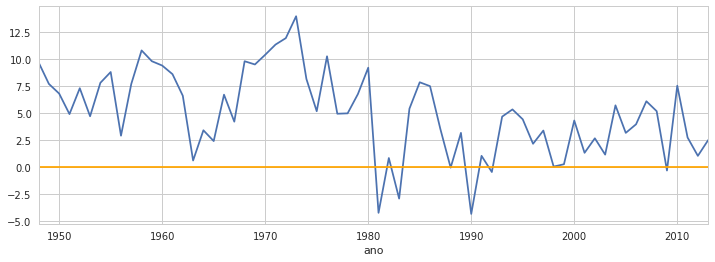

In [11]:
series.pib_cresc.plot(figsize=(12, 4))
plt.axhline(0, c='orange'); # linha marcando o valor 0

E aqui está uma comparação entre o crescimento do pib no Brasil, na América Latina e no Mundo.  

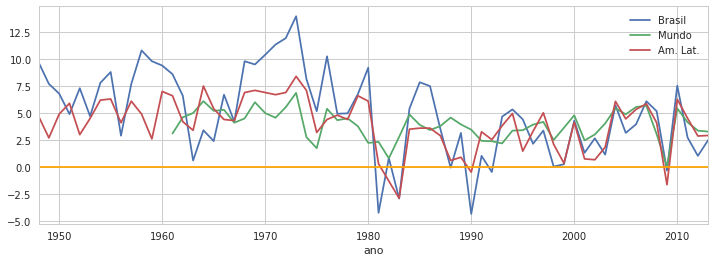

In [12]:
series.pib_cresc.plot(figsize=(12, 4), label='Brasil')
series.pib_mundo_cresc.plot(label='Mundo')
series.pib_al_cresc.plot(label='Am. Lat.')
plt.axhline(0, c='orange') # linha marcando o valor 0
plt.legend(); 

Há mais correlação com a AL e menos com o mundo.

In [13]:
series[['pib_cresc', 'pib_al_cresc', 'pib_mundo_cresc']].corr()

,pib_cresc,pib_al_cresc,pib_mundo_cresc
pib_cresc,1.000000,0.758856,0.486227
pib_al_cresc,0.758856,1.000000,0.633473
pib_mundo_cresc,0.486227,0.633473,1.000000


Podemos criar uma nova coluna com a *diferença* de crescimento entre Brasil e América Latina. Números positivos indicam os anos em que o Brasil cresceu mais do que a América Latina, 

In [17]:
series['diff_br_al'] = series.pib_cresc - series.pib_al_cresc

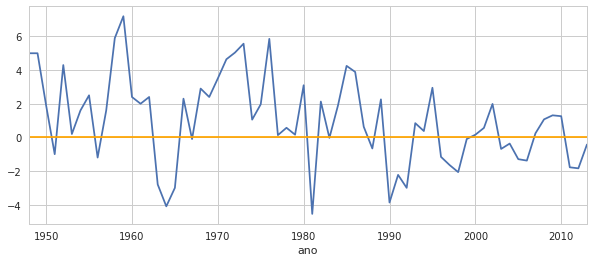

In [18]:
series.diff_br_al.plot(figsize=(10, 4))
plt.axhline(0, c='orange');

Mudando de assunto, aqui está um gráfico da variação da carga tributária brasileira.

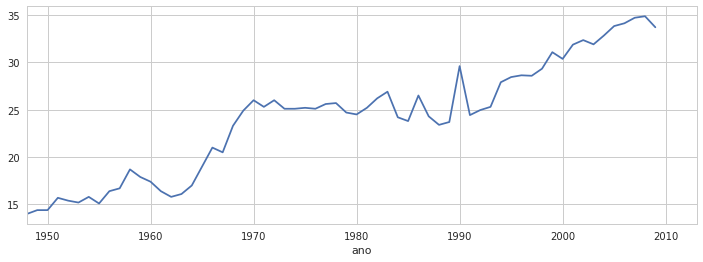

In [16]:
series.carga_trib.plot(figsize=(12, 4));

## Indústria

Vamos analisar outra planilha do mesmo arquivo. Basta indicar o nome dela (o nome da aba) no argumento `sheetname` (este argumento aceita a posição ou nome da planilha). 

Dessa vez, vamos fazer todos os passos de uma vez só.

In [41]:
colunas = list(range(1,10))

ind = pd.read_excel('dados/carta_conjuntura_series_historicas.xls', 
                    sheetname='Tab 4', skiprows=5, skip_footer=2, 
                    parse_cols=colunas)

ind.columns = ind.columns.str.lower()            # todas as letras dos nomes das colunas em caixa baixa
ind.columns = ind.columns.str.replace(' ', '')   # substitui espaço em branco por nada, isto é, 
                                                 # exclui espaço em branco

ind.index = ind.ano
ind.drop('ano', axis=1, inplace=True)

Vejamos o desempenho de todos os setores da indústria.

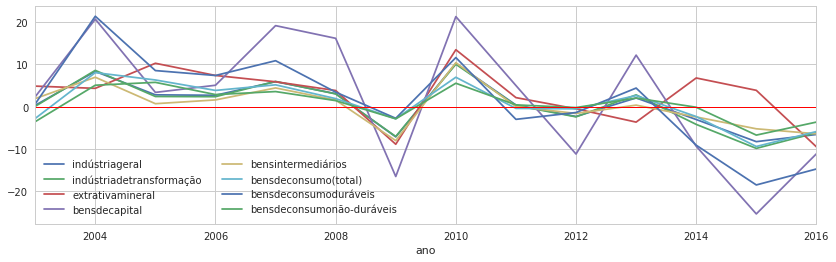

In [42]:
ind.plot(figsize=(14, 4))
plt.axhline(0, c='red', linewidth=1)
plt.legend(ncol=2); # legenda em duas colunas

Duas observações:

- há uma leve tendência de queda no crescimento de todas indústrias, exceto na indústria extrativa mineral.
- como seria de se esperar, a maior dispersão acontece nos bens de capital e a menor nos bens de consumo não-duráveis. 

O último ponto pode ser confirmado comparando os desvios-padrão.

In [43]:
ind.std()

indústriageral                5.610320
indústriadetransformação      5.840370
extrativamineral              6.587299
bensdecapital                14.939364
bensintermediários            4.999491
bensdeconsumo(total)          5.123894
bensdeconsumoduráveis        10.749389
bensdeconsumonão-duráveis     3.815785
dtype: float64

## Composição do PIB (ótica da oferta)

<br>

Vamos ler mais uma das planilhas do arquivo.

<br>

In [25]:
pib = pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname='Tab 6', skiprows=7, skip_footer=4)

In [26]:
pib.head(2)

,Unnamed: 0,Período,Agropecuária,Ext. mineral,Transformação,Construção,Siup,Total,Unnamed: 8,Comércio,...,Serviços de informação,Intermediação financeira e seguros,Outros serviços,Serviços imobiliários e aluguéis,Adm. Públicaa,Total.1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,1971,12.169342,0.727667,27.670058,5.471073,2.350500,36.219298,NaN,15.649508,...,0.564408,6.083399,7.720226,8.882543,9.086510,51.611360,NaN,100,NaN,NaN
1,NaN,1972,12.252365,0.694542,28.443153,5.780022,2.075693,36.993411,NaN,15.218684,...,0.684071,5.952944,8.207587,8.376384,8.749514,50.754224,NaN,100,NaN,NaN


In [27]:
pib.columns = pib.columns.str.lower()            # todas as letras em caixa baixa
pib.columns = pib.columns.str.replace(' ', '')   # substitui espaço em branco por nada, isto é, 
                                                 # exclui espaço em branco

In [28]:
pd.options.display.max_columns = 50 # para mostrar todas as colunas 
                                    # (normalmente há um sinal de reticências indicando 
                                    # que algumas não estão sendo mostradas)

In [29]:
pib.head(2)

,unnamed:0,período,agropecuária,ext.mineral,transformação,construção,siup,total,unnamed:8,comércio,"transporte,armazenagemecorreio",serviçosdeinformação,intermediaçãofinanceiraeseguros,outrosserviços,serviçosimobiliáriosealuguéis,adm.públicaa,total.1,unnamed:17,unnamed:18,unnamed:19,unnamed:20
0,NaN,1971,12.169342,0.727667,27.670058,5.471073,2.350500,36.219298,NaN,15.649508,3.624766,0.564408,6.083399,7.720226,8.882543,9.086510,51.611360,NaN,100,NaN,NaN
1,NaN,1972,12.252365,0.694542,28.443153,5.780022,2.075693,36.993411,NaN,15.218684,3.565040,0.684071,5.952944,8.207587,8.376384,8.749514,50.754224,NaN,100,NaN,NaN


In [30]:
pib.drop(['unnamed:0', 'unnamed:8', 'unnamed:17', 'unnamed:18'], axis=1, inplace=True) # apaga três colunas em branco e o total do pib porque todos os valores são 10

In [31]:
pib.head(2)

,período,agropecuária,ext.mineral,transformação,construção,siup,total,comércio,"transporte,armazenagemecorreio",serviçosdeinformação,intermediaçãofinanceiraeseguros,outrosserviços,serviçosimobiliáriosealuguéis,adm.públicaa,total.1,unnamed:19,unnamed:20
0,1971,12.169342,0.727667,27.670058,5.471073,2.350500,36.219298,15.649508,3.624766,0.564408,6.083399,7.720226,8.882543,9.086510,51.611360,NaN,NaN
1,1972,12.252365,0.694542,28.443153,5.780022,2.075693,36.993411,15.218684,3.565040,0.684071,5.952944,8.207587,8.376384,8.749514,50.754224,NaN,NaN


In [32]:
nomes = ['ano', 'agro', 'mineral', 'transformacao', 'construcao', 'siup', 'total_ind', 'comercio', 'transporte',
'informacao', 'financeiros','outros', 'imobiliarios', 'admpub', 'total_serv', 'impostos_prod', 'pib']

In [33]:
pib.columns = nomes

In [34]:
pib.head(2)

,ano,agro,mineral,transformacao,construcao,siup,total_ind,comercio,transporte,informacao,financeiros,outros,imobiliarios,admpub,total_serv,impostos_prod,pib
0,1971,12.169342,0.727667,27.670058,5.471073,2.350500,36.219298,15.649508,3.624766,0.564408,6.083399,7.720226,8.882543,9.086510,51.611360,NaN,NaN
1,1972,12.252365,0.694542,28.443153,5.780022,2.075693,36.993411,15.218684,3.565040,0.684071,5.952944,8.207587,8.376384,8.749514,50.754224,NaN,NaN


In [35]:
pib.index = pib.ano
pib.drop('ano', axis=1, inplace=True)

In [36]:
pib.head(2)

,agro,mineral,transformacao,construcao,siup,total_ind,comercio,transporte,informacao,financeiros,outros,imobiliarios,admpub,total_serv,impostos_prod,pib
ano,,,,,,,,,,,,,,,,
1971,12.169342,0.727667,27.670058,5.471073,2.350500,36.219298,15.649508,3.624766,0.564408,6.083399,7.720226,8.882543,9.086510,51.611360,NaN,NaN
1972,12.252365,0.694542,28.443153,5.780022,2.075693,36.993411,15.218684,3.565040,0.684071,5.952944,8.207587,8.376384,8.749514,50.754224,NaN,NaN


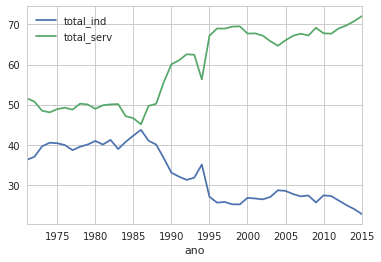

In [37]:
selecao = ['total_ind', 'total_serv'] # mostrar apenas algumas variáveis no gráfico 
pib[selecao].plot();

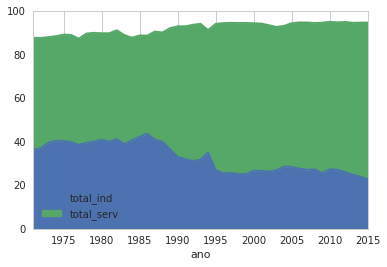

In [38]:
selecao = ['total_ind', 'total_serv']
pib[selecao].plot(kind='area');

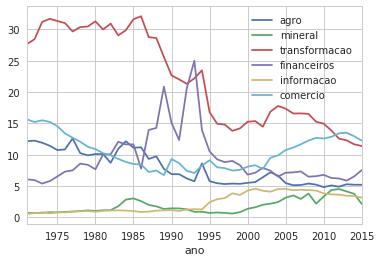

In [39]:
selecao = ['agro', 'mineral', 'transformacao', 'financeiros', 'informacao', 'comercio']
pib[selecao].plot();

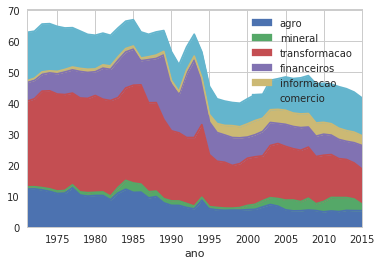

In [40]:
selecao = ['agro', 'mineral', 'transformacao', 'financeiros', 'informacao', 'comercio']
pib[selecao].plot(kind='area');

## Arrecadação tributária

<br>
mudando de planilha novamente.
<br>


In [20]:
trib = pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname='Tab 23', skiprows=6, skip_footer=1)

trib.drop('Unnamed: 0', axis=1, inplace=True)
trib.rename(columns={'Unnamed: 1':'tributos'}, inplace=True)
trib = trib.T # traspõe o dataframe (linhas viram colunas e vice versa)
trib.columns = trib.iloc[0, ]
trib.drop('tributos', axis=0, inplace=True)
trib.columns = trib.columns.str.lower()
trib.columns = trib.columns.str.replace(' ', '')
trib.index = pd.to_datetime(trib.index, format='%Y')

Usando uma estrutura de repetição, é possível criar diversos gráficos de uma vez só.  
Se aparecer uma mensagem com fundo rosa, desconsidere, é apenas um aviso, não um erro. 


/home/lincoln/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


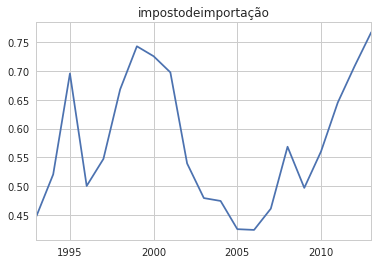

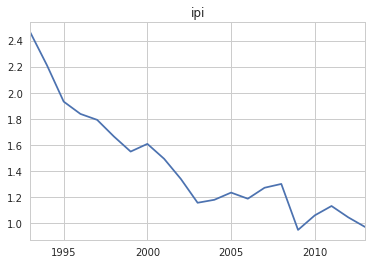

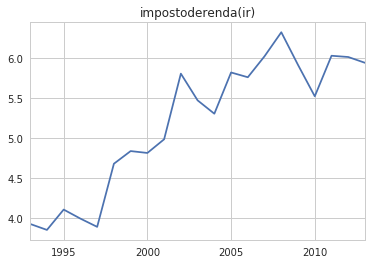

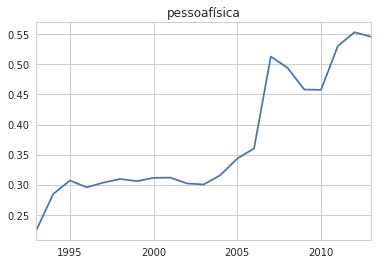

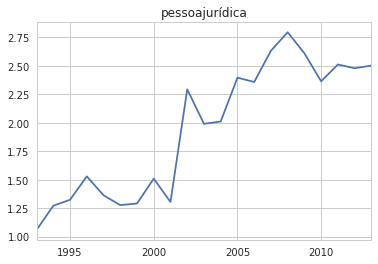

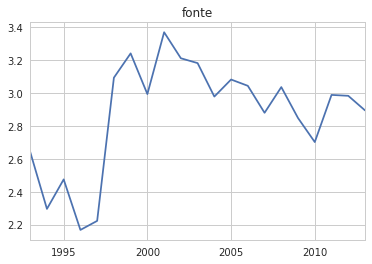

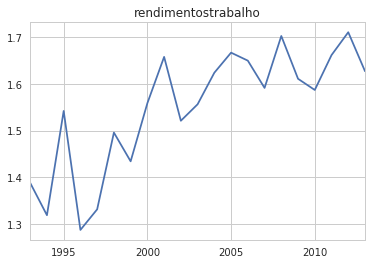

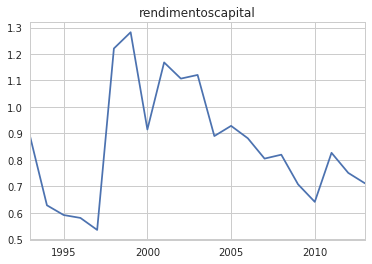

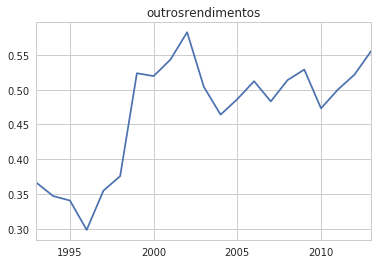

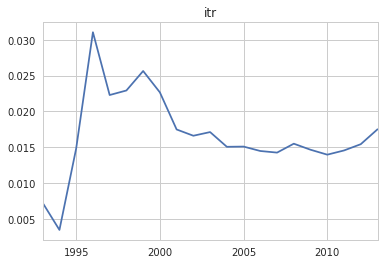

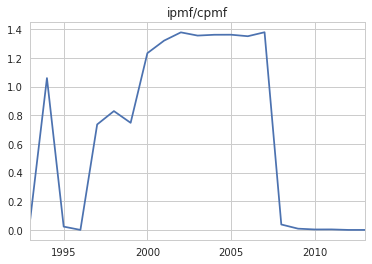

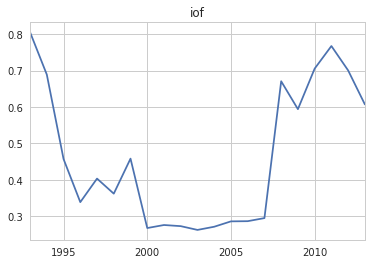

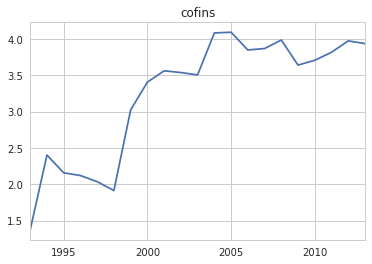

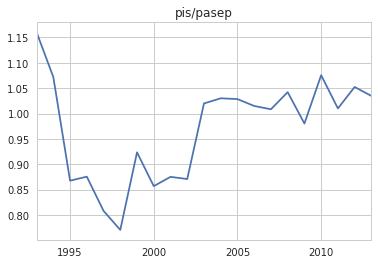

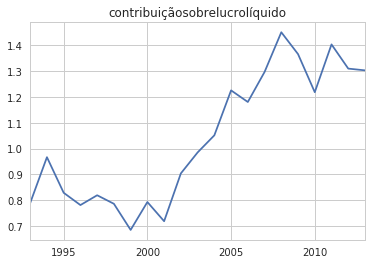

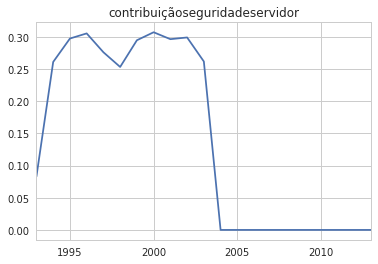

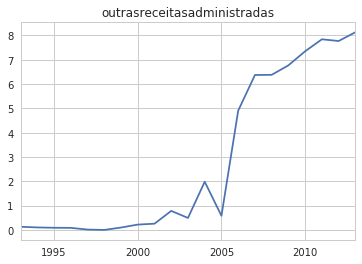

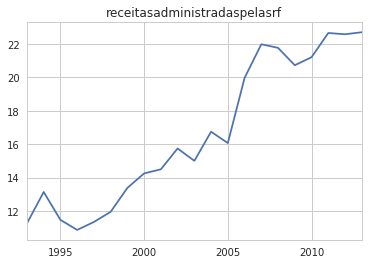

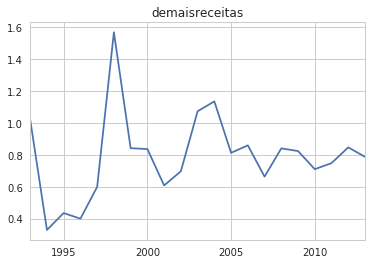

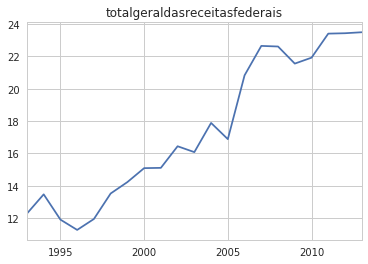

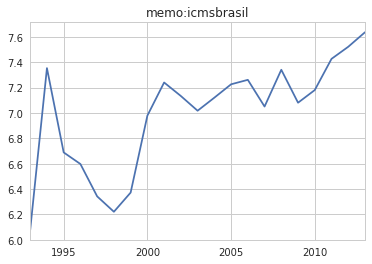

In [21]:
for i in trib.columns:
    fig, ax = plt.subplots()
    trib[str(i)].plot()
    plt.title(i)

## Renda domiciliar

Mais uma planilha.

<br>

In [71]:
renda = pd.read_excel('dados/carta_conjuntura_series_historicas.xls', sheetname='Tab 29', skiprows=6)
renda.drop('Unnamed: 0', axis=1, inplace=True)              # apaga primeira coluna
renda.drop([0, 12, 24, 33], inplace=True)                   # apaga linhas em branco ou com subtítulos
renda.rename(columns={'Unnamed: 1': 'faixa'}, inplace=True) # renomeia a primeira coluna
renda = renda.T                                             # traspõe o dataframe (linhas viram colunas e vice versa)
renda.columns = renda.iloc[0, :]                            # transforma a primeira linha em título
renda = renda[1:]                                           # descarta a primeira linha

In [74]:
renda.head(2)

faixa,1° décimo,2° décimo,3° décimo,4° décimo,5° décimo,6° décimo,7° décimo,8° décimo,9° décimo,10° décimo,Média,1° décimo,2° décimo,3° décimo,4° décimo,5° décimo,6° décimo,7° décimo,8° décimo,9° décimo,10° décimo,Total,1% mais rico,10% mais ricos,50% mais pobres,20% mais pobres,Coeficientes,10 + / 50 -,1 + / 50 -,Coeficiente de Gini
1976,51.4798,95.5385,135.556,179.755,236.975,312.17,419.612,589.098,937.53,3083.49,604.12,0.852146,1.58145,2.24387,2.97548,3.92264,5.16735,6.94583,9.75133,15.5189,51.041,100,17.0753,51.041,11.5756,2.43359,NaN,4.40934,1.47511,0.62274
1977,55.1343,104.005,148.369,198.598,261.09,341.693,452.819,628.611,985.519,3391.6,656.744,0.839511,1.58365,2.25916,3.02398,3.97552,5.20283,6.89492,9.57163,15.0061,51.6427,100,18.4661,51.6428,11.6818,2.42317,NaN,4.42078,1.58076,0.624648


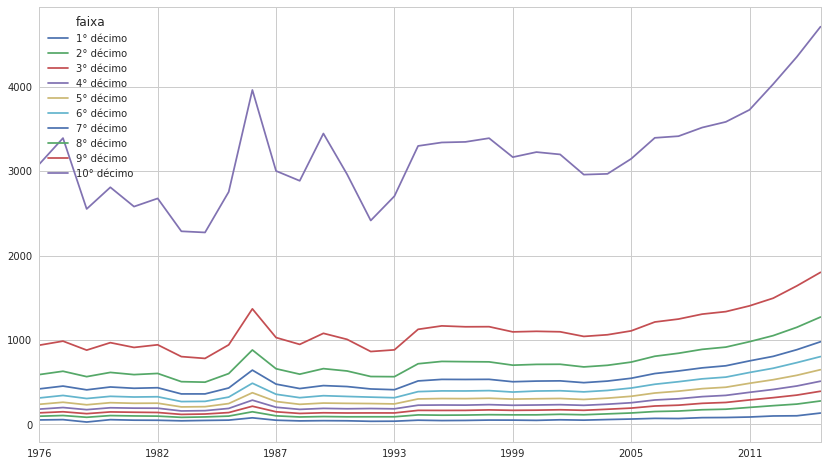

In [73]:
renda.iloc[:, 0:10].plot(figsize=(14, 8));

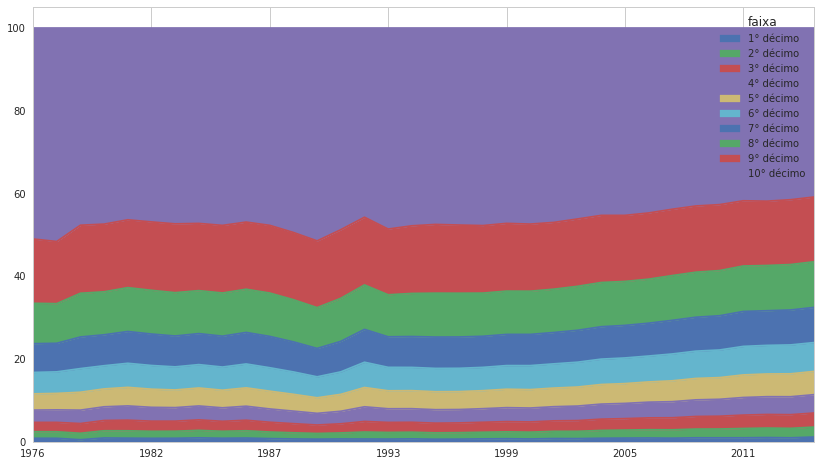

In [75]:
renda.iloc[:, 11:21].plot(kind='area', figsize=(14, 8));

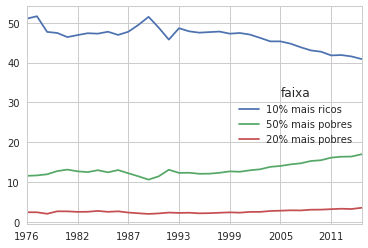

In [76]:
renda.iloc[:, 23:26].plot();

### Sobre a queda do índice de Gini.

Veja como os mesmos dados dão impressões diferentes dependendo da escolha da escala  do eixo y.

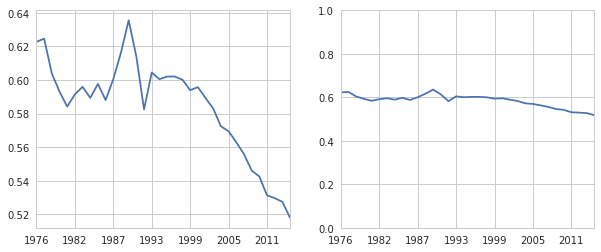

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

renda.iloc[:, 29].plot(ax=ax[0])

renda.iloc[:, 29].plot(ax=ax[1]);
plt.ylim(0,1);